In [47]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = r'\usepackage{libertine}' 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

In [48]:
masterdata = pd.read_csv("../experiments/2019-03-25-12-41_BanditNonStaticAbrupt_/BanditNonStaticAbrupt.csv")
narms = masterdata.iloc[0]['k']

In [49]:
masterdata.head()

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration
0,OR,AbruptGenerator-100,KL-1-100-0.6,100.00,50.58,0.2127,0
1,OR,AbruptGenerator-100,KL-1-100-0.6,100.00,49.74,0.0773,1
2,OR,AbruptGenerator-100,KL-1-100-0.6,100.00,50.44,0.0682,2
3,OR,AbruptGenerator-100,KL-1-100-0.6,99.93,50.64,0.0753,3
4,OR,AbruptGenerator-100,KL-1-100-0.6,99.48,50.29,0.0673,4


In [50]:
sorted(masterdata.bandit.unique())

['CUCB',
 'CUCB-ADWIN-0.1',
 'CUCBm',
 'Exp3.M',
 'Exp3.M-ADWIN-0.1',
 'IMP-TS',
 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-KLUCB',
 'MP-KLUCB-ADWIN-0.1',
 'MP-KLUCBPLUS',
 'MP-OTS',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=1000',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=500',
 'MP-TS',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0',
 'OR',
 'OS']

In [51]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [52]:
masterdata.shape

(3100000, 8)

In [53]:
masterdata.groupby(["bandit", "scalingstrategy"])[['gain', 'k', 'reward/arm']].mean()

,,gain,k,reward/arm
bandit,scalingstrategy,,,
CUCB,KL-1-100-0.6,27.469664,50.851821,0.554124
CUCB-ADWIN-0.1,KL-1-100-0.6,34.235366,56.999934,0.598597
CUCBm,KL-1-100-0.6,27.502618,50.892814,0.554362
Exp3.M,KL-1-100-0.6,10.719911,17.563754,0.478799
Exp3.M-ADWIN-0.1,KL-1-100-0.6,14.248736,24.042507,0.454066
IMP-TS,KL-1-100-0.6,27.736948,51.083932,0.557461
MP-DTS; g=0.7,KL-1-100-0.6,31.792689,53.122824,0.532559
MP-DTS; g=0.8,KL-1-100-0.6,31.887810,53.193452,0.531407
MP-DTS; g=0.9,KL-1-100-0.6,31.922387,53.165107,0.528128


In [54]:
masterdata.describe()

,k,gain,cputime,iteration,reward/arm
count,3.100000e+06,3.100000e+06,3.100000e+06,3.100000e+06,3.100000e+06
mean,5.039030e+01,2.842108e+01,8.544850e-01,4.999950e+04,5.463055e-01
std,3.132125e+01,1.892146e+01,1.605316e+00,2.886752e+04,1.333673e-01
min,1.010000e+00,7.000000e-02,2.870000e-02,0.000000e+00,6.250000e-02
25%,2.038000e+01,1.055000e+01,2.428000e-01,2.499975e+04,5.072706e-01
50%,6.100000e+01,2.726000e+01,3.278000e-01,4.999950e+04,5.967500e-01
75%,7.995000e+01,4.781000e+01,6.960000e-01,7.499925e+04,6.056585e-01
max,1.000000e+02,5.164000e+01,1.301114e+02,9.999900e+04,8.385827e-01


In [55]:
masterdata['dataset'].unique()

array(['AbruptGenerator-100'], dtype=object)

In [56]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 5)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 5)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)

In [57]:
styledictionary = {
    'CUCB': {'marker': 's', 'color': husl5[0]},
    'CUCB-ADWIN-0.1': {'marker': '^', 'color': husl5[0]},
    
    'Exp3.M' : {'marker': 'o', 'color': oranges5[1]},
    'Exp3.M-ADWIN-0.1' : {'marker': '^', 'color': oranges5[1]},
    
    'MP-DTS; g=0.7': {'marker': 'X', 'color': blues5[0]},
    'MP-DTS; g=0.8': {'marker': 'X', 'color': blues5[1]},
    'MP-DTS; g=0.9': {'marker': 'X', 'color': blues5[2]},
    'MP-DTS; g=0.99': {'marker': 'X', 'color': blues5[3]},
    
    'MP-EG; e=0.7': {'marker': 'v', 'color': reds5[0]},
    'MP-EG; e=0.8': {'marker': 'v', 'color': reds5[1]},
    'MP-EG; e=0.9': {'marker': 'v', 'color': reds5[2]},
    'MP-EG; e=0.99': {'marker': 'v', 'color': reds5[3]},
    
    'MP-SWUCB; w=50': {'marker': 'h', 'color': greys5[0]},
    'MP-SWUCB; w=100': {'marker': 'h', 'color': greys5[1]},
    'MP-SWUCB; w=500': {'marker': 'h', 'color': greys5[2]},
    'MP-SWUCB; w=1000': {'marker': 'h', 'color': greys5[3]},
    
    'MP-KLUCB': {'marker': 's', 'color': purples5[0]},
    'MP-KLUCB-ADWIN-0.1': {'marker': '^', 'color': purples5[1]},
    
    'MP-TS': {'marker': 'd', 'color': husl6[0]},
    'MP-TS-ADWIN-0.001': {'marker': '^', 'color': husl6[1]},
    'MP-TS-ADWIN-0.01': {'marker': '^', 'color': husl6[2]},
    'MP-TS-ADWIN-0.1': {'marker': '^', 'color': husl6[3]},
    'MP-TS-ADWIN-0.3': {'marker': '^', 'color': husl6[4]},
    'MP-TS-ADWIN-0.5': {'marker': '^', 'color': husl6[5]},
    'MP-TS-ADWIN-1.0': {'marker': '^', 'color': husl6[6]},
    
    'OD': {'marker': '+', 'color': husl5[2]},
    'OD-ADWIN-0.1': {'marker': '^', 'color': husl5[2]},
    'OR': {'marker': '+', 'color': husl5[3]},
    'OR-ADWIN-0.1': {'marker': '^', 'color': husl5[3]},
    'OSeq-ADWIN-0.1': {'marker': '+', 'color': husl5[4]},
    'OS': {'marker': '+', 'color': blues5[4]},
    'OS-ADWIN-0.1': {'marker': '^', 'color': blues5[4]},
    'ScalingOracle(Dynamic)': {'marker': '+', 'color': reds5[4]},
    'ScalingOracle(Static)': {'marker': '+', 'color': purples5[4]}
}

In [58]:
masterdata["scalingstrategy"].unique()

array(['KL-1-100-0.6'], dtype=object)

In [59]:
delta = 0.6
scalingstrategy  = 'KL-1-100-%s'%delta
data = masterdata.loc[masterdata["scalingstrategy"] == scalingstrategy]

In [60]:
data.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'iteration', 'reward/arm'],
      dtype='object')

In [61]:
data.head()

,bandit,dataset,scalingstrategy,k,gain,cputime,iteration,reward/arm
0,OR,AbruptGenerator-100,KL-1-100-0.6,100.00,50.58,0.2127,0,0.505800
1,OR,AbruptGenerator-100,KL-1-100-0.6,100.00,49.74,0.0773,1,0.497400
2,OR,AbruptGenerator-100,KL-1-100-0.6,100.00,50.44,0.0682,2,0.504400
3,OR,AbruptGenerator-100,KL-1-100-0.6,99.93,50.64,0.0753,3,0.506755
4,OR,AbruptGenerator-100,KL-1-100-0.6,99.48,50.29,0.0673,4,0.505529


In [62]:
data.groupby("bandit")["reward/arm"].describe()

,count,mean,std,min,25%,50%,75%,max
bandit,,,,,,,,
CUCB,100000.0,0.554124,0.162188,0.231276,0.445071,0.601476,0.677898,0.785101
CUCB-ADWIN-0.1,100000.0,0.598597,0.012375,0.219545,0.595072,0.600227,0.604376,0.707682
CUCBm,100000.0,0.554362,0.162436,0.231276,0.444528,0.601500,0.679040,0.785516
Exp3.M,100000.0,0.478799,0.168647,0.133005,0.277479,0.540889,0.625574,0.741117
Exp3.M-ADWIN-0.1,100000.0,0.454066,0.170595,0.062500,0.247619,0.540000,0.599129,0.747826
IMP-TS,100000.0,0.557461,0.166021,0.232428,0.438696,0.601575,0.687390,0.789916
MP-DTS; g=0.7,100000.0,0.532559,0.108617,0.265277,0.392603,0.602060,0.611855,0.787826
MP-DTS; g=0.8,100000.0,0.531407,0.107564,0.266361,0.395538,0.601787,0.608950,0.760943
MP-DTS; g=0.9,100000.0,0.528128,0.109936,0.194313,0.394636,0.600999,0.606496,0.770129


In [63]:
pullref = np.concatenate([np.full(33333,80), np.full(33333,20), np.full(33334,80)])

In [64]:
n = 100000
steps = np.array([((x+1)*n)/(3)for x in range(2)])
stepstates = [0,30,0]

In [65]:
top = 0.9966666666666667 #0.9975 #0.995
low = 0.5016666666666666 # 0.5025 # 0.5
expected_gains = []
for stepstate in stepstates: 
    expected_gains = expected_gains + [np.linspace(top-0.01*stepstate,low-0.01*stepstate,9901)]

In [66]:
husl4 = sns.color_palette("husl", 4)
husl5 = sns.color_palette("husl", 5)
husl6 = sns.color_palette("husl", 7)
greens5 = sns.color_palette("Greens_r", 5)
purples5 = sns.color_palette("Purples_r", 7)
blues5 = sns.color_palette("Blues_r", 5)
reds5 = sns.color_palette("Reds_r", 8)
oranges5 = sns.color_palette("Oranges_r", 5)
greys5 = sns.color_palette("Greys_r", 5)
winter5 = sns.color_palette("viridis_r", 5)

In [67]:
prettynames = {
    "CUCB": "S-CUCB",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-Oracle",
    
    'CUCB-ADWIN-0.1':"S-CUCB-ADWIN",
    'MP-DTS; g=0.7': "S-DTS; $\gamma=0.7$",
    'MP-DTS; g=0.8': "S-DTS; $\gamma=0.8$",
    'MP-DTS; g=0.9': "S-DTS; $\gamma=0.9$",
    'MP-DTS; g=0.99': "S-DTS; $\gamma=0.99$",
    'MP-EG; e=0.7': "S-EG; $\epsilon=0.7$",
    'MP-EG; e=0.8': "S-EG; $\epsilon=0.8$",
    'MP-EG; e=0.9': "S-EG; $\epsilon=0.9$",
    'MP-EG; e=0.99': "S-EG; $\epsilon=0.99$",
    
    'MP-KLUCB-ADWIN-0.1':'S-KL-UCB-ADWIN',
    
    'MP-SWUCB; w=50':'S-SW-UCB; $w=50$',
    'MP-SWUCB; w=100':'S-SW-UCB; $w=100$',
    'MP-SWUCB; w=500':'S-SW-UCB; $w=500$',
    'MP-SWUCB; w=1000':'S-SW-UCB; $w=1000$',
    
    'MP-TS-ADWIN-0.001': "S-TS-ADWIN; $\delta=0.001$",
    'MP-TS-ADWIN-0.01': "S-TS-ADWIN; $\delta=0.01$",
    'MP-TS-ADWIN-0.3': "S-TS-ADWIN; $\delta=0.3$",
    'MP-TS-ADWIN-0.5': "S-TS-ADWIN; $\delta=0.5$",
    'MP-TS-ADWIN-1.0': "S-TS-ADWIN; $\delta=1.0$",
}

In [68]:
plotkind = "small"

shortlist = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1', 
             'OR', 
             'OS']

prettynames = {
    "CUCB": "S-CUCB",
    "CUCB-ADWIN-0.1": "S-CUCB-ADWIN",
    "Exp3.M": "S-Exp3.M",
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN",
    "MP-KLUCB": "S-KL-UCB",
    'MP-KLUCB-ADWIN-0.1': "S-KL-UCB-ADWIN",
    "MP-TS": "S-TS",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-Oracle",
}

styledictionary = {
    
    'MP-TS': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[0], 'linestyle': ":"},
    'MP-KLUCB': {'marker': '^', 'color': blues5[0], 'linestyle': "-"},
    'MP-KLUCB-ADWIN-0.1': {'marker': '^', 'color': blues5[0], 'linestyle': ":"},
    'Exp3.M' : {'marker': 's', 'color': purples5[0], 'linestyle': "-"},
    'Exp3.M-ADWIN-0.1' : {'marker': 's', 'color': purples5[0], 'linestyle': ":"},
    'CUCB': {'marker': 'D', 'color': greens5[0], 'linestyle': "-"},
    'CUCB-ADWIN-0.1': {'marker': 'D', 'color': greens5[0], 'linestyle': ":"},
    'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
    'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
}

<IPython.core.display.Javascript object>


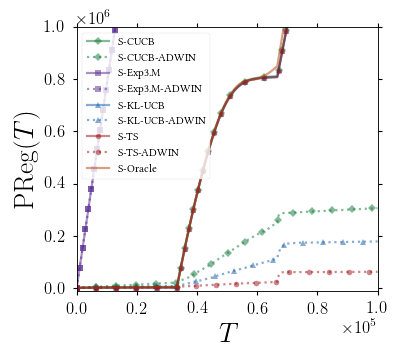

CUCB : 2529344.13
CUCB-ADWIN-0.1 : 305672.65
Exp3.M : 4261233.82
Exp3.M-ADWIN-0.1 : 3599067.77
MP-KLUCB : 2521945.07
MP-KLUCB-ADWIN-0.1 : 178163.91
MP-TS : 2466482.84
MP-TS-ADWIN-0.1 : 61774.59
OR : 5849137.21
OS : 2632600.2


In [69]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.xlabel(r'$T$')
plt.ylim((-10000,1000000))
plt.legend(fontsize = 10, ncol=1, loc='upper left')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("abrupt_PReg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


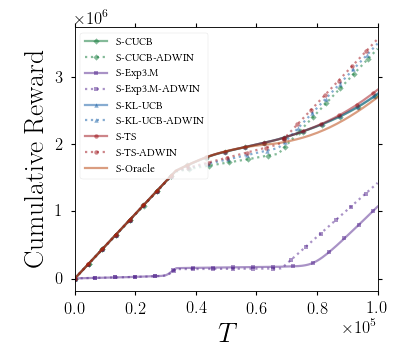

CUCB : 2746966.36
CUCB-ADWIN-0.1 : 3423536.61
Exp3.M : 1071991.14
Exp3.M-ADWIN-0.1 : 1424873.57
MP-KLUCB : 2753389.19
MP-KLUCB-ADWIN-0.1 : 3500671.69
MP-TS : 2812195.5
MP-TS-ADWIN-0.1 : 3569071.0
OR : 64423.58
OS : 2700779.3


In [70]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Cumulative~Reward}$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=1, loc='upper left')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("abrupt_gain_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


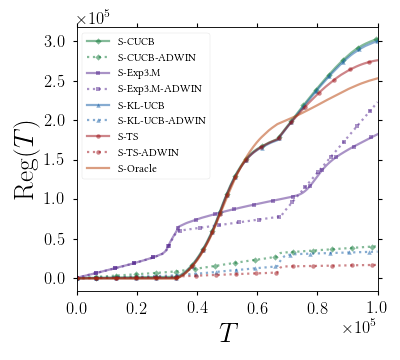

CUCB : 302822.748003
CUCB-ADWIN-0.1 : 40810.1062557
Exp3.M : 182391.395749
Exp3.M-ADWIN-0.1 : 223048.828324
MP-KLUCB : 300080.793675
MP-KLUCB-ADWIN-0.1 : 33905.562758
MP-TS : 275883.539901
MP-TS-ADWIN-0.1 : 17185.6577848
OR : 70678.2578825
OS : 253030.266219


In [71]:
%matplotlib notebook

plt.figure(figsize=(5,4.5))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps[steps < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=1, loc='upper left')

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.savefig("abrupt_Reg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


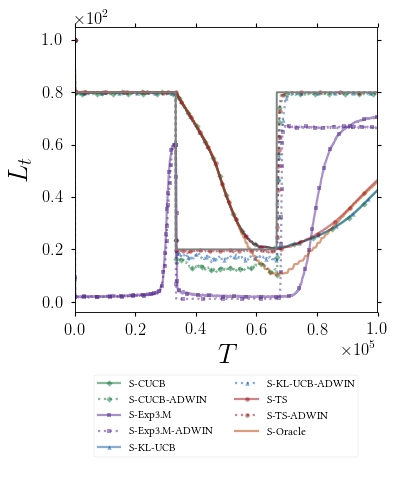

CUCB : 50.8518211000022
CUCB-ADWIN-0.1 : 56.99993410000071
Exp3.M : 17.563754400000057
Exp3.M-ADWIN-0.1 : 24.042507499999996
MP-KLUCB : 50.92686890000345
MP-KLUCB-ADWIN-0.1 : 58.27945049999609
MP-TS : 51.4743234000019
MP-TS-ADWIN-0.1 : 59.444845700015094
OR : 1.5145131000000407
OS : 49.614743400001444


In [73]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::100]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

plt.plot(pullref, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.2))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.35)
plt.savefig("abrupt_Lt_delta=%s_%s.pdf"%(delta,plotkind))

<IPython.core.display.Javascript object>


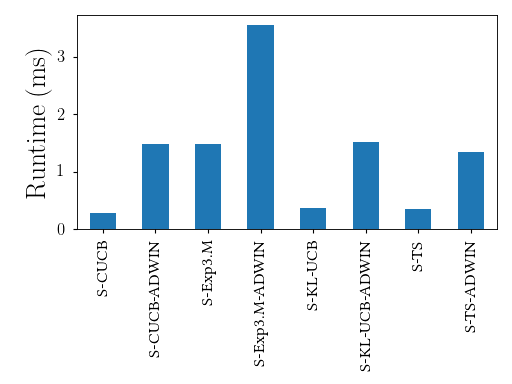

In [28]:
%matplotlib notebook

algs = ['MP-TS', 
             'MP-TS-ADWIN-0.1', 
             'MP-KLUCB',
             'MP-KLUCB-ADWIN-0.1',
             'Exp3.M', 
             'Exp3.M-ADWIN-0.1', 
             'CUCB', 
             'CUCB-ADWIN-0.1']

means = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar")
plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.tight_layout()
plt.savefig("abrupt_Runtime.pdf")

<IPython.core.display.Javascript object>


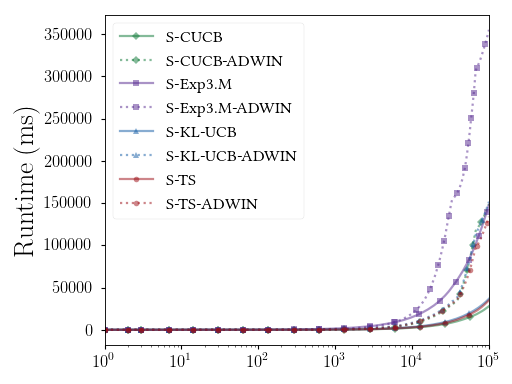

In [29]:
%matplotlib notebook

data_grouped = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    cumsum.plot(label=prettynames[name],linewidth=lw, logx=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Runtime~(ms)}$")
    plt.legend()
plt.tight_layout()
plt.savefig("abrupt_CumulativeRuntime.pdf")

# Extended analysis (with competitors)

In [31]:
plotkind = "long"

shortlist = [
 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=1000',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=500',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0'
]

prettynames = {
    "CUCB": "S-CUCB",
    "Exp3.M": "S-Exp3.M",
    "MP-KLUCB": "S-KL-UCB",
    "MP-TS": "S-TS",
    "OD": "Oracle (Dynamic)",
    "OR": "Oracle (Random)",
    "OS": "S-OS",
    
    'MP-KLUCB-ADWIN-0.1':'S-KL-UCB-ADWIN; $\delta=0.1$',
    "Exp3.M-ADWIN-0.1": "S-Exp3.M-ADWIN; $\delta=0.1$",
    'CUCB-ADWIN-0.1':"S-CUCB-ADWIN; $\delta=0.1$",
    
    'MP-DTS; g=0.7': "S-dTS; $\gamma=0.7$",
    'MP-DTS; g=0.8': "S-dTS; $\gamma=0.8$",
    'MP-DTS; g=0.9': "S-dTS; $\gamma=0.9$",
    'MP-DTS; g=0.99': "S-dTS; $\gamma=0.99$",
    'MP-EG; e=0.7': "S-EG; $\epsilon=0.7$",
    'MP-EG; e=0.8': "S-EG; $\epsilon=0.8$",
    'MP-EG; e=0.9': "S-EG; $\epsilon=0.9$",
    'MP-EG; e=0.99': "S-EG; $\epsilon=0.99$",
    
    
    'MP-SWUCB; w=50':'S-SW-UCB; $w=50$',
    'MP-SWUCB; w=100':'S-SW-UCB; $w=100$',
    'MP-SWUCB; w=500':'S-SW-UCB; $w=500$',
    'MP-SWUCB; w=1000':'S-SW-UCB; $w=1000$',
    
    'MP-TS-ADWIN-0.001': "S-TS-ADWIN; $\delta=0.001$",
    'MP-TS-ADWIN-0.01': "S-TS-ADWIN; $\delta=0.01$",
    "MP-TS-ADWIN-0.1": "S-TS-ADWIN; $\delta=0.1$",
    'MP-TS-ADWIN-0.3': "S-TS-ADWIN; $\delta=0.3$",
    'MP-TS-ADWIN-0.5': "S-TS-ADWIN; $\delta=0.5$",
    'MP-TS-ADWIN-1.0': "S-TS-ADWIN; $\delta=1.0$",
}

styledictionary = {
     'MP-DTS; g=0.7': {'marker': 'p', 'color': blues5[0], 'linestyle': "-"},
     'MP-DTS; g=0.8': {'marker': 'p', 'color': blues5[1], 'linestyle': "-"},
     'MP-DTS; g=0.9': {'marker': 'p', 'color': blues5[2], 'linestyle': "-"},  
     'MP-DTS; g=0.99': {'marker': 'p', 'color': blues5[3], 'linestyle': "-"},
    
     'MP-EG; e=0.7': {'marker': 'P', 'color': purples5[0], 'linestyle': "-"},
     'MP-EG; e=0.8': {'marker': 'P', 'color': purples5[1], 'linestyle': "-"},
     'MP-EG; e=0.9': {'marker': 'P', 'color': purples5[2], 'linestyle': "-"},
     'MP-EG; e=0.99': {'marker': 'P', 'color': purples5[3], 'linestyle': "-"},

     'MP-SWUCB; w=50': {'marker': 's', 'color': greens5[0], 'linestyle': "-"},
     'MP-SWUCB; w=100': {'marker': 's', 'color': greens5[1], 'linestyle': "-"},
     'MP-SWUCB; w=500': {'marker': 's', 'color': greens5[2], 'linestyle': "-"},
     'MP-SWUCB; w=1000': {'marker': 's', 'color': greens5[3], 'linestyle': "-"},
     
    
     'MP-TS-ADWIN-0.001': {'marker': 'o', 'color': reds5[5], 'linestyle': "-"},
     'MP-TS-ADWIN-0.01': {'marker': 'o', 'color': reds5[4], 'linestyle': "-"},
     'MP-TS-ADWIN-0.1': {'marker': 'o', 'color': reds5[3], 'linestyle': "-"},
     'MP-TS-ADWIN-0.3': {'marker': 'o', 'color': reds5[2], 'linestyle': "-"},
     'MP-TS-ADWIN-0.5': {'marker': 'o', 'color': reds5[1], 'linestyle': "-"},
     'MP-TS-ADWIN-1.0': {'marker': 'o', 'color': reds5[0], 'linestyle': "-"},
    
     'OR': {'marker': '', 'color': husl5[2], 'linestyle': "-"},
     'OS': {'marker': '', 'color': oranges5[0], 'linestyle': "-"},
}

<IPython.core.display.Javascript object>


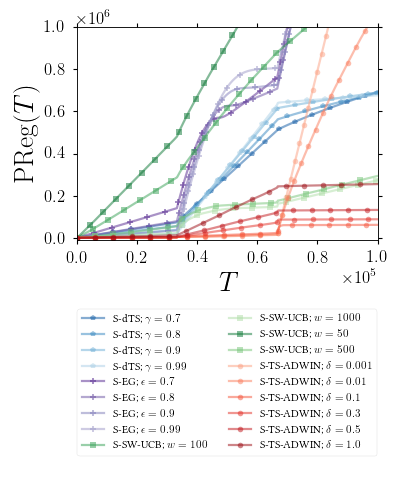

MP-DTS; g=0.7 : 692733.69
MP-DTS; g=0.8 : 686072.48
MP-DTS; g=0.9 : 689361.34
MP-DTS; g=0.99 : 675916.82
MP-EG; e=0.7 : 3023203.09
MP-EG; e=0.8 : 2726945.64
MP-EG; e=0.9 : 2551937.17
MP-EG; e=0.99 : 2496267.25
MP-SWUCB; w=100 : 1293768.27
MP-SWUCB; w=1000 : 273458.54
MP-SWUCB; w=50 : 1874000.3
MP-SWUCB; w=500 : 293692.82
MP-TS-ADWIN-0.001 : 1945377.76
MP-TS-ADWIN-0.01 : 1076891.13
MP-TS-ADWIN-0.1 : 61774.59
MP-TS-ADWIN-0.3 : 88255.61
MP-TS-ADWIN-0.5 : 132590.61
MP-TS-ADWIN-1.0 : 255168.86


In [32]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    ks = df.sort_values("iteration").reset_index().k
    regret = np.abs(pullref - ks)
    cumsum = regret.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=5, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{PReg}(T)$")
plt.xlabel(r'$T$')
plt.ylim((-10000,1000000))
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("abrupt_PReg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


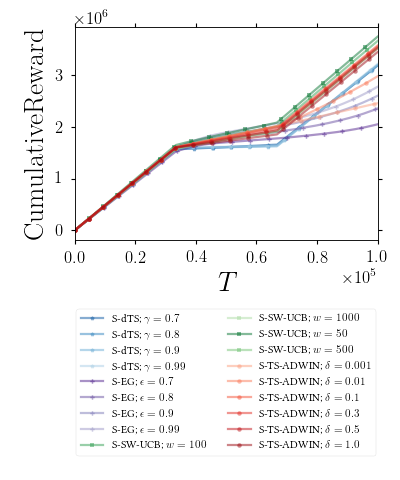

MP-DTS; g=0.7 : 3179268.87
MP-DTS; g=0.8 : 3188780.97
MP-DTS; g=0.9 : 3192238.67
MP-DTS; g=0.99 : 3211169.09
MP-EG; e=0.7 : 2047163.77
MP-EG; e=0.8 : 2351929.73
MP-EG; e=0.9 : 2598044.36
MP-EG; e=0.99 : 2771886.68
MP-SWUCB; w=100 : 3655529.05
MP-SWUCB; w=1000 : 3532650.98
MP-SWUCB; w=50 : 3738381.24
MP-SWUCB; w=500 : 3512258.16
MP-TS-ADWIN-0.001 : 2453978.6
MP-TS-ADWIN-0.01 : 2973333.58
MP-TS-ADWIN-0.1 : 3569071.0
MP-TS-ADWIN-0.3 : 3546263.17
MP-TS-ADWIN-0.5 : 3516113.13
MP-TS-ADWIN-1.0 : 3441745.77


In [34]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Cumulative Reward}$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("abrupt_gain_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


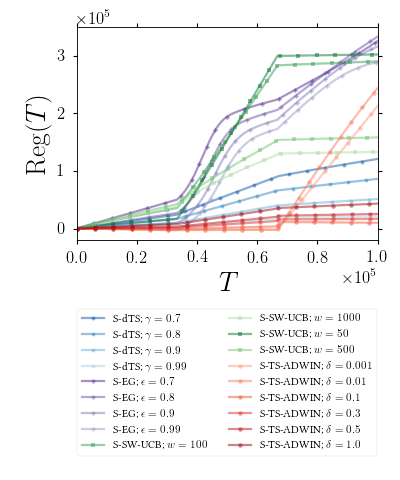

MP-DTS; g=0.7 : 120672.57362
MP-DTS; g=0.8 : 86028.2258814
MP-DTS; g=0.9 : 51162.1632179
MP-DTS; g=0.99 : 21043.2554147
MP-EG; e=0.7 : 325200.743165
MP-EG; e=0.8 : 332802.143144
MP-EG; e=0.9 : 315617.592408
MP-EG; e=0.99 : 288513.497428
MP-SWUCB; w=100 : 289976.879071
MP-SWUCB; w=1000 : 132953.922161
MP-SWUCB; w=50 : 301932.41799
MP-SWUCB; w=500 : 158018.459227
MP-TS-ADWIN-0.001 : 212554.345866
MP-TS-ADWIN-0.01 : 243639.541429
MP-TS-ADWIN-0.1 : 9969.08690723
MP-TS-ADWIN-0.3 : 16728.7755154
MP-TS-ADWIN-0.5 : 25244.3888337
MP-TS-ADWIN-1.0 : 43192.1806942


In [35]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    cumsum = df.sort_values("iteration").reset_index().gain.cumsum()
    name = df.iloc[0,0]
    
    ks = df.sort_values("iteration").reset_index().k
    it = df.sort_values("iteration").reset_index().iteration
    
    currentsteps = []
    for x in it:
        currentsteps = currentsteps + [len(steps[steps < x])]
    
    gains = df.sort_values("iteration").reset_index().gain
    regret = [expected_gains[s][int((x-1)*100)]*x for s,x in zip(currentsteps, ks)] - gains
    cumsum = regret.cumsum()
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        cumsum.plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, cumsum[len(cumsum)-1]))
    
plt.tick_params(top=True, right=True)
plt.ylabel(r"$\mathrm{Reg}(T)$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("abrupt_Reg_delta=%s_%s.pdf"%(delta, plotkind))

<IPython.core.display.Javascript object>


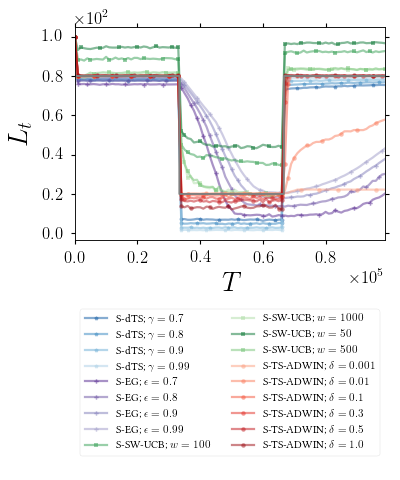

MP-DTS; g=0.7 : 53.122823500003854
MP-DTS; g=0.8 : 53.19345160000138
MP-DTS; g=0.9 : 53.16510680000147
MP-DTS; g=0.99 : 53.41934100000665
MP-EG; e=0.7 : 38.3524914999998
MP-EG; e=0.8 : 43.69752920000126
MP-EG; e=0.9 : 48.00083629999765
MP-EG; e=0.99 : 51.0531212999963
MP-SWUCB; w=100 : 72.8827023000006
MP-SWUCB; w=1000 : 62.15300360000149
MP-SWUCB; w=50 : 78.71789039999956
MP-SWUCB; w=500 : 62.51515900000054
MP-TS-ADWIN-0.001 : 40.88152999999435
MP-TS-ADWIN-0.01 : 49.499952700004826
MP-TS-ADWIN-0.1 : 59.444845700015094
MP-TS-ADWIN-0.3 : 59.20869550000131
MP-TS-ADWIN-0.5 : 58.8429812999958
MP-TS-ADWIN-1.0 : 57.940335799999566


In [36]:
%matplotlib notebook

plt.figure(figsize=(5,6))

data_grouped = data[[x in shortlist for x in data["bandit"]]].groupby("bandit")

for i,df in data_grouped:
    df = df.sort_values("iteration").reset_index()
    dff = df.iloc[df.index[::1000]]
    name = df['bandit'][0]
    
    if(name in ["OD", "OR"]):
        pass # do not plot it 
    else:
        lw = 2
        dff['k'].plot(label=prettynames[name], linewidth=lw, linestyle=styledictionary[name]['linestyle'],
                            markevery=0.05, alpha=0.5, markersize=4, #logx=True,
                           marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    
    print("%s : %s"%(name, df['k'].mean()))

plt.plot(pullref, marker="", color="grey")
plt.tick_params(top=True, right=True)
plt.ylabel("$L_t$")
plt.xlabel("$T$")
plt.legend(fontsize = 10, ncol=2, loc='upper center', bbox_to_anchor=(0.5, -0.3))

plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.tight_layout()
plt.subplots_adjust(bottom=0.5)
plt.savefig("abrupt_Lt_delta=%s_%s.pdf"%(delta,plotkind))

<IPython.core.display.Javascript object>


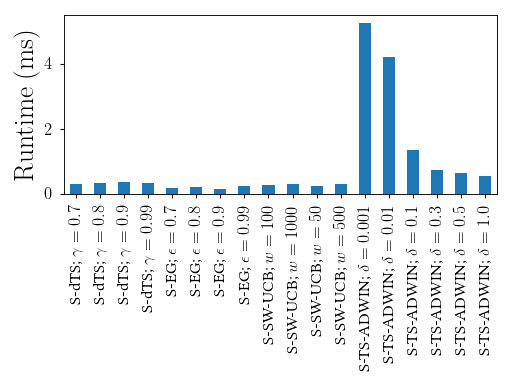

In [37]:
%matplotlib notebook

algs = [

 'MP-DTS; g=0.7',
 'MP-DTS; g=0.8',
 'MP-DTS; g=0.9',
 'MP-DTS; g=0.99',
 'MP-EG; e=0.7',
 'MP-EG; e=0.8',
 'MP-EG; e=0.9',
 'MP-EG; e=0.99',
 'MP-SWUCB; w=50',
 'MP-SWUCB; w=100',
 'MP-SWUCB; w=500',
 'MP-SWUCB; w=1000',
 'MP-TS-ADWIN-0.001',
 'MP-TS-ADWIN-0.01',
 'MP-TS-ADWIN-0.1',
 'MP-TS-ADWIN-0.3',
 'MP-TS-ADWIN-0.5',
 'MP-TS-ADWIN-1.0']

means = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit").mean()
means.index = [prettynames[x] for x in means.index]
means["cputime"].plot(kind = "bar")
plt.ylabel("$\mathrm{Runtime~(ms)}$")
plt.tight_layout()
plt.savefig("abrupt_Runtime_%s.pdf"%plotkind)

<IPython.core.display.Javascript object>


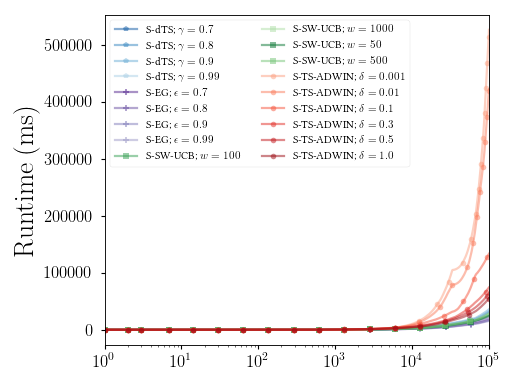

In [38]:
%matplotlib notebook

data_grouped = masterdata[masterdata["bandit"].isin(algs)].groupby("bandit")

for i,df in data_grouped:
    time = df.sort_values("iteration").reset_index().cputime
    cumsum = time.cumsum()
    name = df.iloc[0,0]

    lw = 2
    cumsum.plot(label=prettynames[name],linewidth=lw, logx=True,
                linestyle=styledictionary[name]['linestyle'],
                        markevery=0.05, alpha=0.5, markersize=5,
                       marker= styledictionary[name]['marker'], c=styledictionary[name]['color'])
    plt.ylabel("$\mathrm{Runtime~(ms)}$")
    plt.legend(fontsize=10, ncol=2)
plt.tight_layout()
plt.savefig("abrupt_Runtime_%s.pdf"%plotkind)